In [63]:
# Needed libraries 
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')
%matplotlib inline

In [73]:
# Models parameters
parameters = {'alpha':1.0,
              'beta':0.3,
              'gamma':0.5,
              'delta':0.25
             }

# Model diffrential equations
def pred_prey_ode(t, u,parameters=parameters):
    alpha,beta,gamma,delta = parameters.values()
    du = [0]*4
    du[0] = alpha * u[0] - beta * u[0] * u[1]
    du[1] = - gamma * u[1] + delta * u[0] * u[1]
    du[2] = alpha * du[0] - beta * (du[0] * u[1] + u[0] * du[1])
    du[3] = - gamma * du[1] + delta * (du[0] * u[1] + u[0] * du[1])
    return du

In [74]:
# Initial conditions
N0 = 2.8
M0 = 4.13

# Timeframe of [0,25]
t0, T, N = 0, 25, 1000
t = np.linspace(t0,T, N)


In [78]:
#Solve ODE with initial conditions
def init_values(parameters):
    alpha,beta,gamma,delta = parameters.values()
    dN0 = alpha * N0 - beta * N0 * M0
    dM0 = - gamma * N0 + delta * N0 * M0 - 1
    return np.array([N0,M0,dN0,dM0])
    
sol = solve_ivp(pred_prey_ode, [t0, T], init_values(parameters), t_eval=t, method='DOP853').y.T
N, M, dN, dM = sol[:,0], sol[:,1], sol[:,2], sol[:,3]
Nmin, Nmax = (np.min(N),np.max(N))
Mmin, Mmax = (np.min(M),np.max(M))

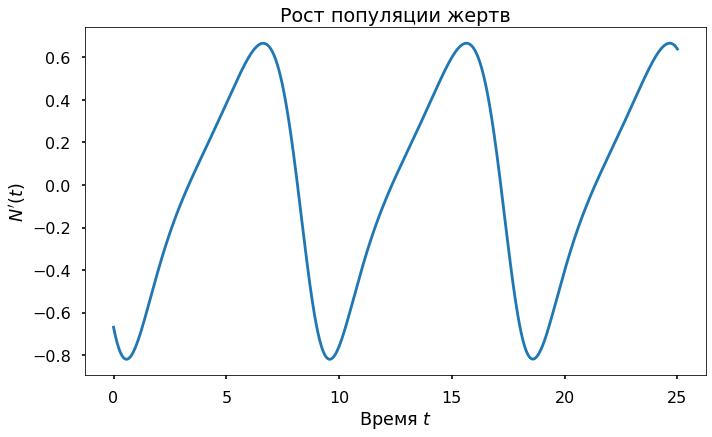

In [76]:
plt.figure(figsize=(10,10/1.618))
plt.plot(t,dN)

plt.xlabel("Время $t$")
plt.ylabel("$N'(t)$")
plt.title("Рост популяции жертв")
plt.tight_layout()

plt.savefig("dN.png")
plt.show()

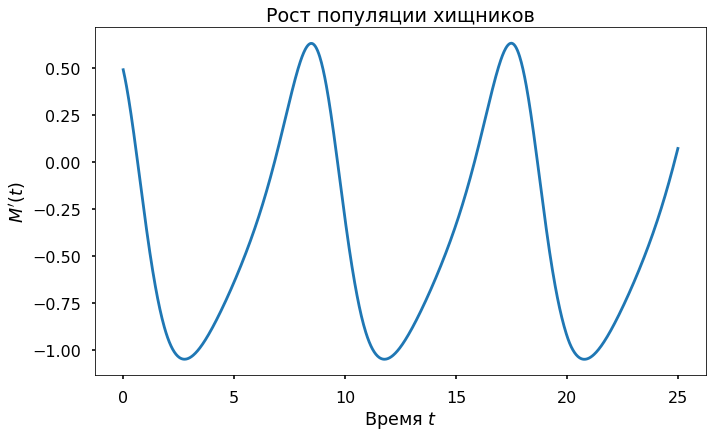

In [79]:
plt.figure(figsize=(10,10/1.618))
plt.plot(t,dM)

plt.xlabel("Время $t$")
plt.ylabel("$M'(t)$")
plt.title("Рост популяции хищников")
plt.tight_layout()

plt.savefig("dM.png")
plt.show()

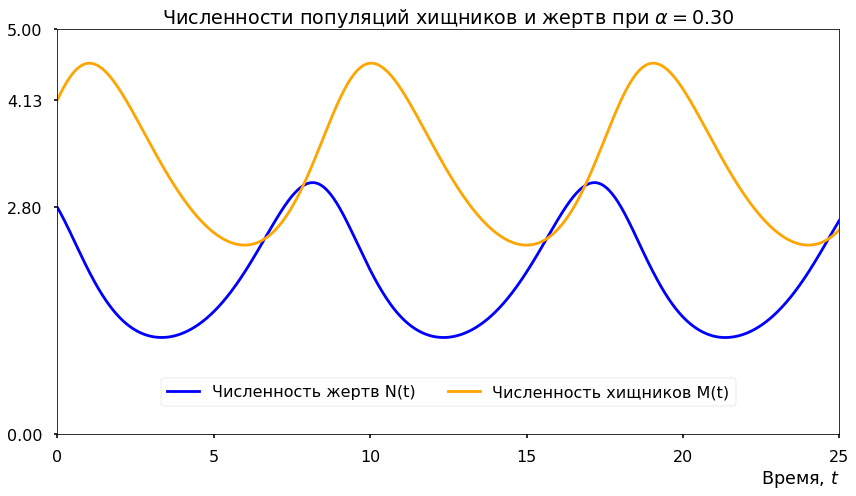

In [69]:
plt.figure(figsize=(12,7))
plt.plot(t, N, color='blue', linestyle='-', label="Численность жертв N(t)")
plt.plot(t, M, color='orange', linestyle='-', label="Численность хищников M(t)")

plt.yticks([0,N0,M0,5])
plt.xlim(0,25)
plt.xlabel('Время, $t$',loc='right')

plt.legend(bbox_to_anchor=(0.50,0.05),
           loc="lower center",
           ncol=2)
plt.title(r"Численности популяций хищников и жертв при $\alpha=0.30$")
plt.tight_layout()

#plt.savefig("predator_prey_model_alpha_03.png",dpi=300)
plt.show()

In [70]:
def get_extrema(array):
    direction = np.sign(array[:-1]-array[1:])
    change_dir = np.multiply(direction[:-1],direction[1:])
    ext_indexes = np.where(change_dir==-1)[0] + 1
    return ext_indexes

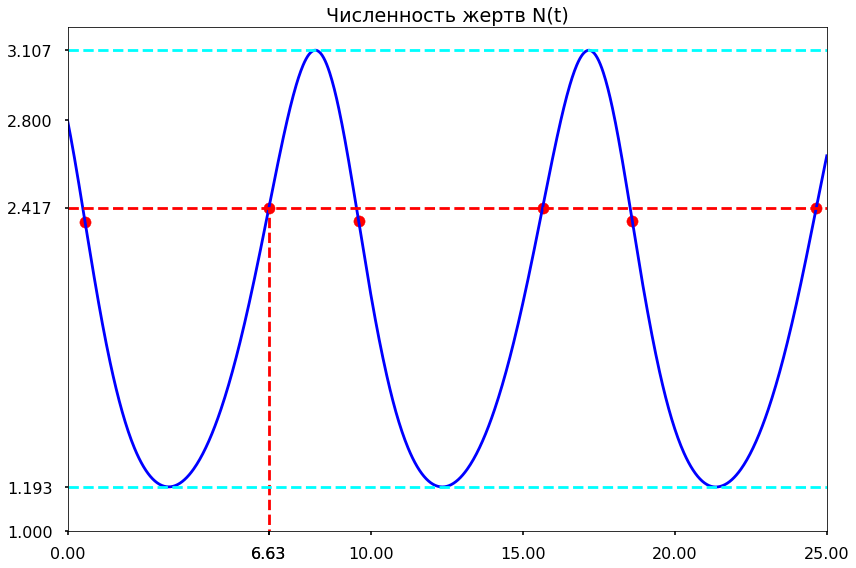

In [71]:
ind_extrema = get_extrema(dN)
argmax = ind_extrema[1]

plt.figure(figsize=(12,8))
plt.plot(t, N, color='blue', linestyle='-')
plt.scatter(t[ind_extrema],N[ind_extrema],color='red')

plt.plot([t[argmax],t[argmax]],[0,N[argmax]], color='red', linestyle='--')
#plt.plot([t[argmax[1]],t[argmax[1]]],[0,Nmax], color='red', linestyle='--')

plt.plot([0,25],[Nmin,Nmin], color='cyan', linestyle='--')
plt.plot([0,25],[N[ind_extrema[1]],N[ind_extrema[1]]], color='red', linestyle='--')
plt.plot([0,25],[Nmax,Nmax], color='cyan', linestyle='--')

plt.yticks([1,Nmin,N0,Nmax,N[argmax]])
plt.xticks([0,10,15,20,25,t[argmax],t[argmax]])

plt.xlim(0,25)
plt.ylim(1,Nmax+0.1)
plt.title("Численность жертв N(t)")
plt.tight_layout()

plt.savefig("prey_population.png",dpi=300)

plt.show()

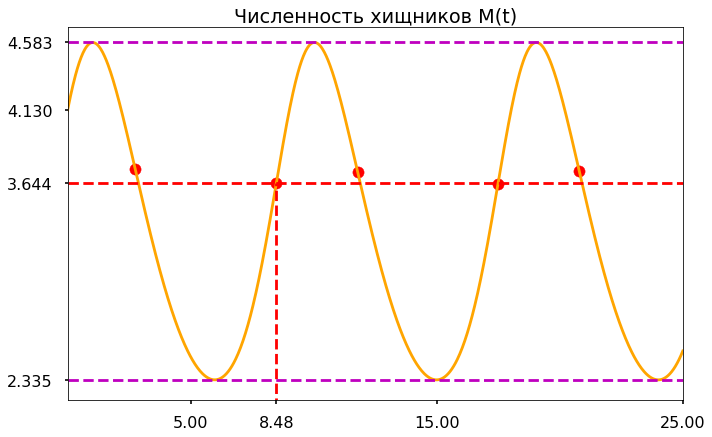

In [72]:
ind_dM_0 = get_extrema(dM)
argmax = ind_dM_0[1]

plt.figure(figsize=(10,10/1.618))
plt.plot(t, M, color='orange', linestyle='-')
plt.scatter(t[ind_dM_0],M[ind_dM_0],color='red')

plt.plot([t[argmax],t[argmax]],[0,M[argmax]], color='red', linestyle='--')
plt.plot([0,25],[M[argmax],M[argmax]], color='red', linestyle='--')

plt.plot([0,25],[Mmin,Mmin], color='m', linestyle='--')
plt.plot([0,25],[Mmax,Mmax], color='m', linestyle='--')

plt.yticks([2,Mmin,M0,Mmax,M[argmax]])
plt.xticks([5,15,25,t[argmax]])

plt.xlim(0,25)
plt.ylim(2.2,Mmax+0.1)
plt.title("Численность хищников M(t)")
plt.tight_layout()

plt.savefig("predator_population.png",dpi=300)

plt.show()

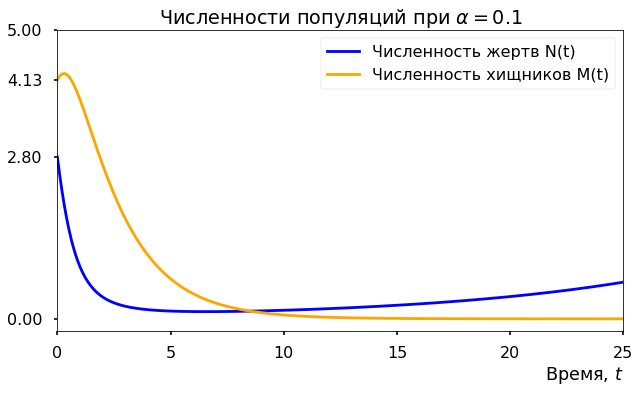

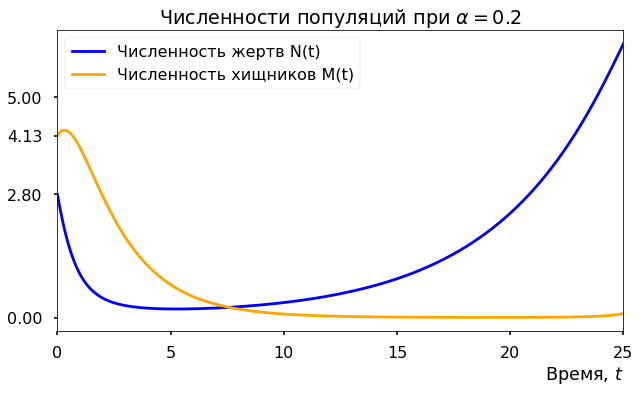

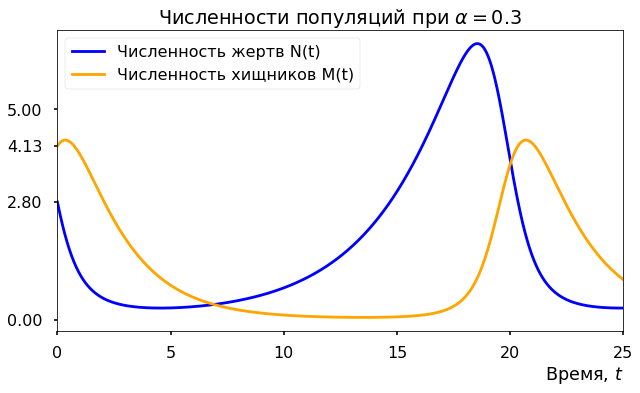

In [115]:
for i,alpha in enumerate([0.1,0.2,0.3]):
    parameters['alpha'] = alpha
    sol = solve_ivp(pred_prey_ode, [t0, T], [N0,M0,0,0], t_eval=t, method='DOP853').y.T
    N, M = sol[:,0], sol[:,1]
    
    plt.figure(figsize=(9,9/1.618))
    plt.plot(t, N, color='blue', linestyle='-', label="Численность жертв N(t)")
    plt.plot(t, M, color='orange', linestyle='-', label="Численность хищников M(t)")

    plt.yticks([0,N0,M0,5])
    plt.xlim(0,25)
    plt.xlabel('Время, $t$',loc='right')

    plt.legend()
    plt.title(r"Численности популяций при $\alpha=$"+f"{alpha}")
    plt.tight_layout()

    plt.savefig(f"predator_prey_model_alpha_{i}.png",dpi=300)
    plt.show()

In [95]:
T_N, T_M = [], []
alpha_list = np.linspace(0.3,1.0,8)
for alpha in alpha_list:
    parameters['alpha'] = alpha
    
    sol = solve_ivp(pred_prey_ode, [t0, T], [N0,M0,0,0], t_eval=t, method='DOP853').y.T
    N, M = sol[:,0], sol[:,1]
    
    N_ext_ind = get_extrema(N)
    M_ext_ind = get_extrema(M)
    
    t_n = t[N_ext_ind[2]] - t[N_ext_ind[0]]
    t_m = t[M_ext_ind[2]] - t[M_ext_ind[0]]
    
    T_N.append(t_n)
    T_M.append(t_m)

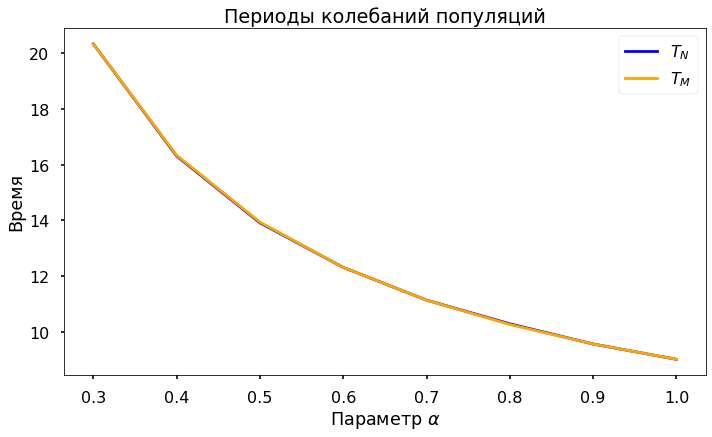

In [109]:
plt.figure(figsize=(10,10/1.618))

plt.plot(alpha_list,T_N,color='blue',linestyle='-',label=r"$T_N$")
plt.plot(alpha_list,T_M,color='orange',linestyle='-',label=r"$T_M$")

plt.xlabel(r"Параметр $\alpha$")
plt.ylabel("Время")

plt.legend(loc='best')
plt.title("Периоды колебаний популяций")
plt.tight_layout()

plt.savefig("fluctuation_periods.png",dpi=300)

plt.show()

In [113]:
print(f'Alpha \tT_N \tT_M')
for i, alpha in enumerate(alpha_list):
    print(f'\n{round(alpha,1)} \t{round(T_N[i],2)} \t{round(T_M[i],2)}')

Alpha 	T_N 	T_M

0.3 	20.35 	20.35

0.4 	16.32 	16.34

0.5 	13.91 	13.94

0.6 	12.31 	12.31

0.7 	11.14 	11.14

0.8 	10.29 	10.26

0.9 	9.56 	9.56

1.0 	9.01 	9.01
